In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [77]:
data = pd.read_csv('./脑电波数据/A2.csv',encoding='gbk')
data

,日期,时间,脑电连接信号是否正常,专注度,放松,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2
0,06/02/2024,16:56:56,0,26,81,105799,38541,9428,5340,2641,2795,1819,565
1,06/02/2024,16:56:57,0,17,78,910787,128976,18774,16671,20261,7062,2646,1190
2,06/02/2024,16:56:58,0,14,66,17900,8380,436,902,807,450,324,120
3,06/02/2024,16:56:59,0,13,54,223692,67406,3675,32822,8171,6344,3848,3331
4,06/02/2024,16:57:00,0,23,61,94327,60500,56097,13441,33591,15541,5978,5504
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,06/02/2024,17:00:11,0,40,63,42966,44028,40754,16641,8156,6792,8125,1302
196,06/02/2024,17:00:12,0,27,60,4617,31850,60716,18285,34587,4103,6852,2379
197,06/02/2024,17:00:13,0,53,69,23460,15023,11301,2300,6834,12524,5315,2171
198,06/02/2024,17:00:14,0,54,64,83838,53749,31696,15329,22930,13475,3110,1800


In [78]:
mask = data['脑电连接信号是否正常'] != 0
# 使用布尔索引删除这些行
df = data[~mask]
df =df.reset_index(drop=True)
df

,日期,时间,脑电连接信号是否正常,专注度,放松,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2
0,06/02/2024,16:56:56,0,26,81,105799,38541,9428,5340,2641,2795,1819,565
1,06/02/2024,16:56:57,0,17,78,910787,128976,18774,16671,20261,7062,2646,1190
2,06/02/2024,16:56:58,0,14,66,17900,8380,436,902,807,450,324,120
3,06/02/2024,16:56:59,0,13,54,223692,67406,3675,32822,8171,6344,3848,3331
4,06/02/2024,16:57:00,0,23,61,94327,60500,56097,13441,33591,15541,5978,5504
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,06/02/2024,17:00:11,0,40,63,42966,44028,40754,16641,8156,6792,8125,1302
196,06/02/2024,17:00:12,0,27,60,4617,31850,60716,18285,34587,4103,6852,2379
197,06/02/2024,17:00:13,0,53,69,23460,15023,11301,2300,6834,12524,5315,2171
198,06/02/2024,17:00:14,0,54,64,83838,53749,31696,15329,22930,13475,3110,1800


In [82]:
# 最值归一化
cols_to_scale = df.iloc[:, 3:13]  # 选择第6到第13列
scaler = MinMaxScaler(feature_range=(0, 1), copy=True)
scaler.fit(cols_to_scale)
scaled_features = scaler.transform(cols_to_scale)
df_MinMax = pd.DataFrame(data=scaled_features, columns=["放松","专注度","Delta","Theta","Alpha1","Alpha2","Beta1",
                                                       "Beta2","Gamma1","Gamma2"])
df_MinMax

,放松,专注度,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2
0,0.168831,0.7625,0.058274,0.020744,0.022749,0.029559,0.022352,0.033704,0.021970,0.025889
1,0.051948,0.7250,0.509396,0.071708,0.046339,0.095908,0.237102,0.095031,0.034123,0.062249
2,0.012987,0.5750,0.009015,0.003747,0.000053,0.003572,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.4250,0.124342,0.037011,0.008228,0.190480,0.089751,0.084712,0.051788,0.186806
4,0.129870,0.5125,0.051845,0.033119,0.140545,0.076994,0.399566,0.216896,0.083090,0.313224
...,...,...,...,...,...,...,...,...,...,...
195,0.350649,0.5375,0.023062,0.023836,0.101818,0.095732,0.089568,0.091151,0.114641,0.068765
196,0.181818,0.5000,0.001571,0.016973,0.152204,0.105358,0.411705,0.052503,0.095934,0.131421
197,0.519481,0.6125,0.012131,0.007491,0.027477,0.011758,0.073456,0.173534,0.073346,0.119320
198,0.532468,0.5500,0.045967,0.029314,0.078955,0.088049,0.269632,0.187203,0.040942,0.097737


0.627

In [85]:
df_transposed = df_MinMax.T
from sklearn.decomposition import PCA
# 4. 使用PCA进行特征降维
pca = PCA(n_components=1)  # 假设我们希望降维到2个主成分
principal_components = pca.fit_transform(df_transposed.iloc[6:10,:])
principal_components

array([[ 1.05571413],
       [ 0.06173314],
       [-0.55933991],
       [-0.55810736]])

In [89]:
df_transposed.iloc[0].mean()

0.43

In [90]:
y = principal_components[0]*df_transposed.iloc[6,:]+principal_components[1]*df_transposed.iloc[7,:]
+principal_components[2]*df_transposed.iloc[8,:]+principal_components[3]*df_transposed.iloc[9,:]
y.mean()


0.1413874813096866

In [17]:
other_df = df.drop(df.columns[5:13], axis=1)
other_df

,日期,时间,脑电连接信号是否正常,专注度,放松
0,06/02/2024,16:56:56,0,26,81
1,06/02/2024,16:56:57,0,17,78
2,06/02/2024,16:56:58,0,14,66
3,06/02/2024,16:56:59,0,13,54
4,06/02/2024,16:57:00,0,23,61
...,...,...,...,...,...
195,06/02/2024,17:00:11,0,40,63
196,06/02/2024,17:00:12,0,27,60
197,06/02/2024,17:00:13,0,53,69
198,06/02/2024,17:00:14,0,54,64


In [18]:
other_df = df.drop(df.columns[5:13], axis=1)
merged_df=pd.concat([other_df, df_MinMax],axis=1)
merged_df

,日期,时间,脑电连接信号是否正常,专注度,放松,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2
0,06/02/2024,16:56:56,0,26,81,-0.883452,-0.958512,-0.954501,-0.940883,-0.955295,-0.932593,-0.956060,-0.948223
1,06/02/2024,16:56:57,0,17,78,0.018791,-0.856584,-0.907321,-0.808185,-0.525796,-0.809937,-0.931753,-0.875502
2,06/02/2024,16:56:58,0,14,66,-0.981971,-0.992506,-0.999894,-0.992856,-1.000000,-1.000000,-1.000000,-1.000000
3,06/02/2024,16:56:59,0,13,54,-0.751316,-0.925979,-0.983543,-0.619040,-0.820498,-0.830576,-0.896425,-0.626389
4,06/02/2024,16:57:00,0,23,61,-0.896310,-0.933762,-0.718910,-0.846012,-0.200868,-0.566207,-0.833821,-0.373553
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,06/02/2024,17:00:11,0,40,63,-0.953876,-0.952328,-0.796363,-0.808536,-0.820863,-0.817698,-0.770717,-0.862470
196,06/02/2024,17:00:12,0,27,60,-0.996858,-0.966053,-0.695592,-0.789283,-0.176590,-0.894994,-0.808133,-0.737157
197,06/02/2024,17:00:13,0,53,69,-0.975739,-0.985019,-0.945046,-0.976484,-0.853088,-0.652931,-0.853307,-0.761359
198,06/02/2024,17:00:14,0,54,64,-0.908066,-0.941371,-0.842089,-0.823901,-0.460737,-0.625595,-0.918115,-0.804526


c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 19987 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 27880 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 24230 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 25918 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 26494 missing from current font.
  font.set_text(s, 0.0, flags=fl

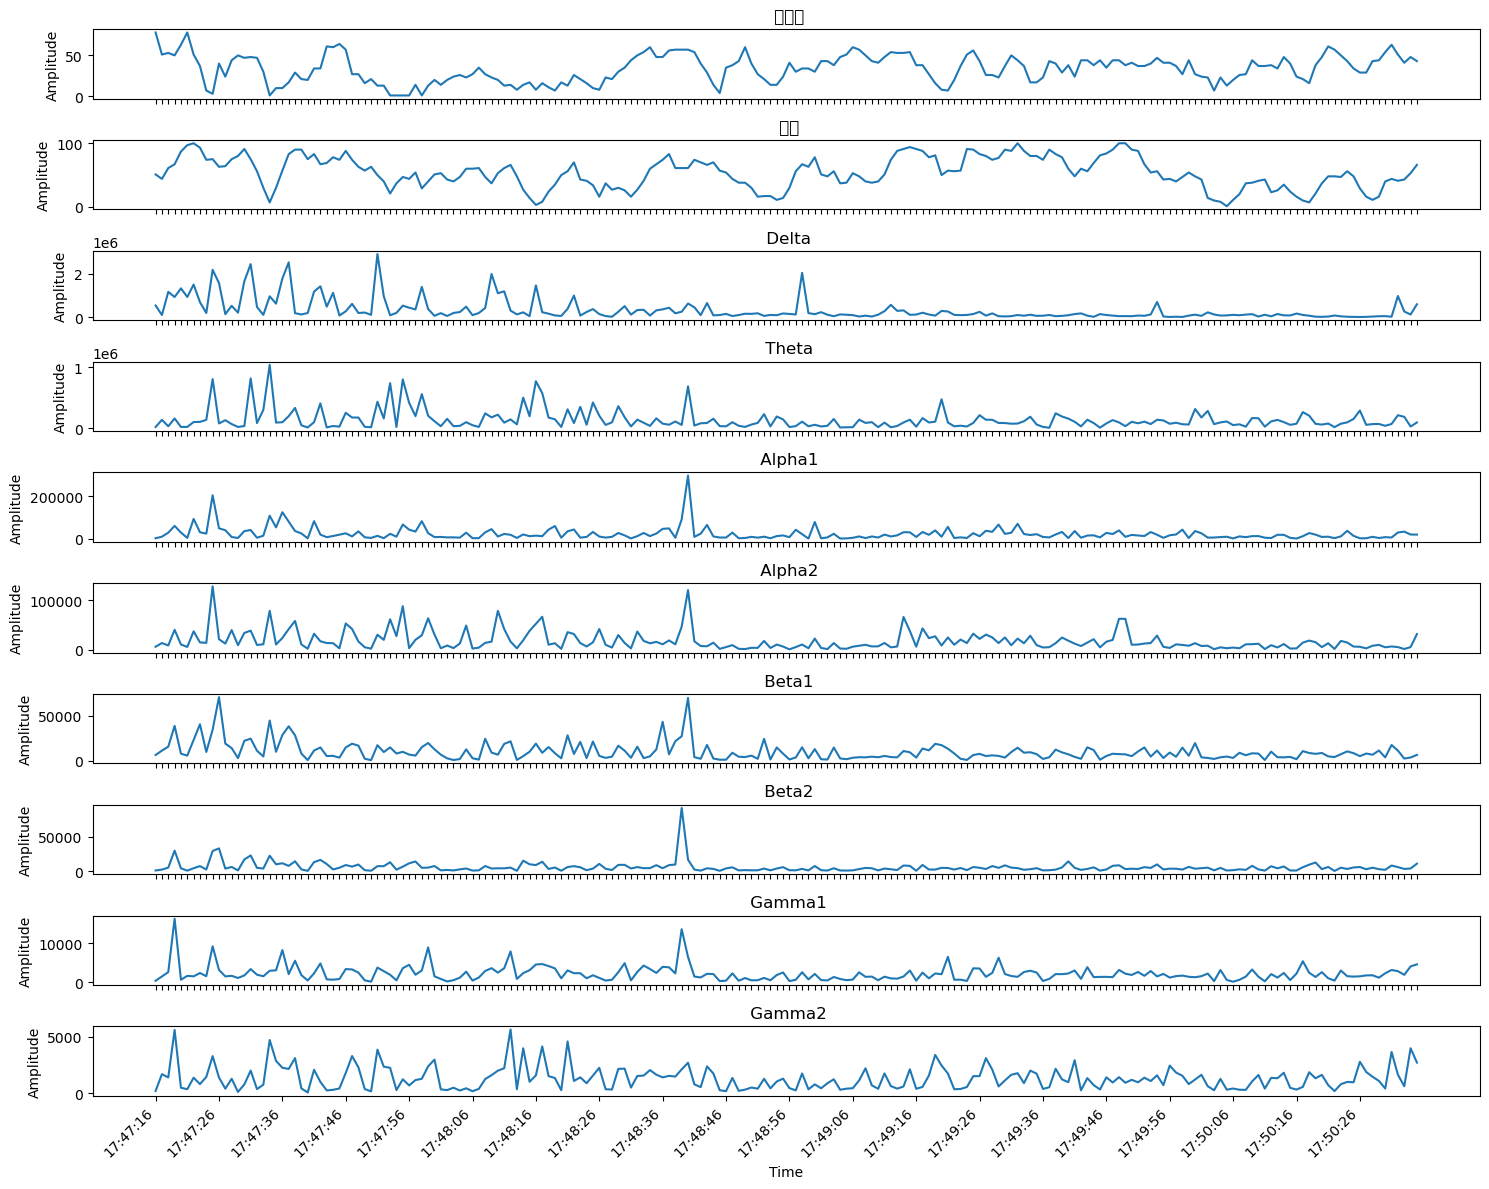

In [10]:
#未标准化的数据
import matplotlib.pyplot as plt

# 假设脑电波数据位于第2列到第9列（索引从0开始，即1到8）
# 选择脑电波数据列
eeg_data = data.iloc[:, 3:13]

# 假设第一列是时间戳或者索引列
x_axis = data.iloc[:, 1]
x_axis
# 创建一个图形和子图
fig, ax = plt.subplots(10, 1, figsize=(15, 12))

# 绘制每个通道的脑电波数据到对应的子图
EEg_list = ["Delta","Theta","Alpha1","Alpha2","Beta1","Beta2","Gamma1","Gamma2"]
for i, (ax, col) in enumerate(zip(ax.flatten(), eeg_data.columns)):
    ax.plot(x_axis, eeg_data[col], label=EEg_list[i])
    ax.set_title(f' {EEg_list[i]}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Amplitude')

# 格式化x轴时间显示
plt.gcf().autofmt_xdate()  # 自动旋转日期标记以便它们不会重叠

# 每隔n个时间点显示一个时间标签
# 例如，每隔50个数据点显示一个标签
interval = 10
x_ticks = x_axis[::interval]
plt.xticks(x_ticks, rotation=45)  # 旋转标签45度

# 调整子图之间的间距
plt.tight_layout()

# 显示图表
plt.show()

In [105]:
import matplotlib.pyplot as plt

# 假设脑电波数据位于第2列到第9列（索引从0开始，即1到8）
# 选择脑电波数据列
eeg_data = merged_df.iloc[:, 5:13]

# 假设第一列是时间戳或者索引列
x_axis = merged_df.iloc[:, 1]
x_axis
# 创建一个图形和子图
fig, ax = plt.subplots(8, 1, figsize=(15, 8))

# 绘制每个通道的脑电波数据到对应的子图
EEg_list = ["Delta","Theta","Alpha1","Alpha2","Beta1","Beta2","Gamma1","Gamma2"]
for i, (ax, col) in enumerate(zip(ax.flatten(), eeg_data.columns)):
    ax.plot(x_axis, eeg_data[col], label=EEg_list[i])
    ax.set_title(f' {EEg_list[i]}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Amplitude')

# 格式化x轴时间显示
plt.gcf().autofmt_xdate()  # 自动旋转日期标记以便它们不会重叠

# 每隔n个时间点显示一个时间标签
# 例如，每隔50个数据点显示一个标签
interval = 10
x_ticks = x_axis[::interval]
plt.xticks(x_ticks, rotation=45)  # 旋转标签45度

# 调整子图之间的间距
plt.tight_layout()

# 显示图表
plt.show()

0      17:47:16
1      17:47:17
2      17:47:18
3      17:47:19
4      17:47:20
         ...   
193    17:50:31
194    17:50:32
195    17:50:33
196    17:50:34
197    17:50:35
Name: 时间, Length: 198, dtype: object

In [82]:
# 2. 计算频域特征
import numpy as np
from scipy.signal import welch, find_peaks
frequencies = np.linspace(0, 1, 100)  # 假设采样频率为1Hz
for col in df.columns[5:13]:  # 假设前8列是脑电波信号
    power_density, freqs = welch(df[col], fs=1)

c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 198, using nperseg = 198
  warnings.warn('nperseg = {0:d} is greater than input length '


In [14]:
data.iloc[:, 3:13]

,专注度,放松,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2
0,78,51,539944,15807,1827,5839,6493,1121,417,189
1,51,44,102340,134788,9470,13372,11316,2417,1533,1689
2,53,61,1162988,28209,28336,8392,15695,5234,2635,1399
3,50,67,926490,157242,60541,40168,38635,29760,16347,5620
4,63,87,1322740,17367,28833,10425,7966,4284,677,481
...,...,...,...,...,...,...,...,...,...,...
195,63,44,26104,66225,5343,6422,17550,8295,3188,3660
196,51,41,973919,210375,29190,5112,11287,5974,2877,1641
197,41,43,264430,184054,33257,1238,2568,3382,1943,616
198,48,53,125780,24779,19524,5117,3708,4024,4098,3992


In [19]:
#计算相关系数
df_col = merged_df.iloc[:,5:13]
correlation_matrix = df_col.corr()
print(correlation_matrix)

           Delta     Theta    Alpha1    Alpha2     Beta1     Beta2    Gamma1  \
Delta   1.000000  0.521383  0.168140  0.095587  0.560668  0.508620  0.501204   
Theta   0.521383  1.000000  0.177256  0.068954  0.443502  0.645557  0.832041   
Alpha1  0.168140  0.177256  1.000000  0.233497  0.317801  0.437186  0.143292   
Alpha2  0.095587  0.068954  0.233497  1.000000  0.204284  0.200803  0.136299   
Beta1   0.560668  0.443502  0.317801  0.204284  1.000000  0.687265  0.550976   
Beta2   0.508620  0.645557  0.437186  0.200803  0.687265  1.000000  0.740523   
Gamma1  0.501204  0.832041  0.143292  0.136299  0.550976  0.740523  1.000000   
Gamma2  0.367725  0.583366  0.217195  0.195693  0.491573  0.644143  0.680351   

          Gamma2  
Delta   0.367725  
Theta   0.583366  
Alpha1  0.217195  
Alpha2  0.195693  
Beta1   0.491573  
Beta2   0.644143  
Gamma1  0.680351  
Gamma2  1.000000  


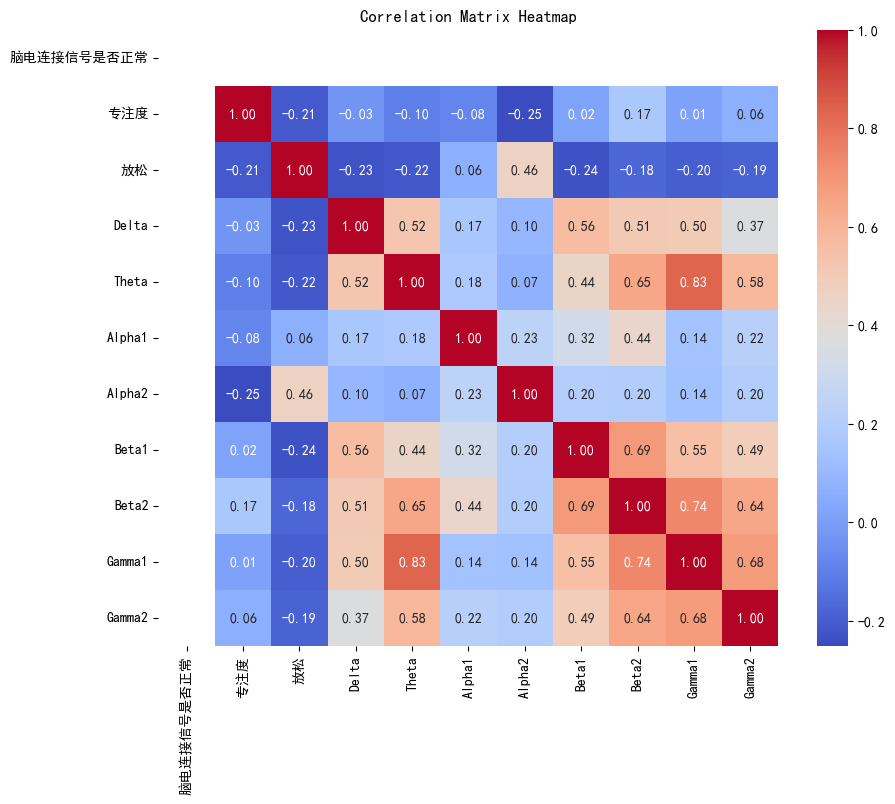

In [20]:
#绘制相关性热力图
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.font_manager import FontProperties

# 设置中文字体路径，例如使用'SimHei'字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
plt.rcParams['axes.unicode_minus'] = False  # 正确显示负号

# 假设df是你的DataFrame，correlation_matrix是相关系数矩阵
correlation_matrix = df.corr()

# 使用seaborn的heatmap函数绘制热力图
plt.figure(figsize=(10, 8))  # 可以根据需要调整图形大小
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix Heatmap')  # 标题
plt.show()

In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 存储每个K值的SSE
sse = []

# 尝试不同的K值
for k in range(2, 11):  # 从K=2到K=10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_col)
    sse.append(kmeans.inertia_)  # 存储每个K值的SSE

# 计算SSE的一阶差分
diff_sse = np.diff(sse)

# 寻找SSE下降速率显著减缓的位置，即diff_sse的最小值
optimal_k_index = np.argmin(diff_sse)

# 转换为K值（因为diff_sse是从2开始的，所以需要+1）
optimal_k = optimal_k_index + 2
print(f"Optimal K value based on the elbow method: {optimal_k}")
optimal_k

c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1

Optimal K value based on the elbow method: 2


c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1

2

In [21]:
# 转置数据
df_transposed = df_col.T
df_transposed

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
Delta,-0.883452,0.018791,-0.981971,-0.751316,-0.896310,-0.213101,0.319435,-0.723303,-0.991903,-0.853156,...,-0.943905,-0.959730,-0.978697,-0.737928,-0.963530,-0.953876,-0.996858,-0.975739,-0.908066,-0.742574
Theta,-0.958512,-0.856584,-0.992506,-0.925979,-0.933762,-0.898924,-0.657880,-0.898198,-0.970819,-0.930080,...,-0.963331,-0.974892,-0.980712,-0.793246,-0.971422,-0.952328,-0.966053,-0.985019,-0.941371,-0.975758
Alpha1,-0.954501,-0.907321,-0.999894,-0.983543,-0.718910,-0.943042,-0.921027,-0.920982,-0.988046,-0.954112,...,-0.849081,-0.936399,-0.710712,-0.948913,-0.891198,-0.796363,-0.695592,-0.945046,-0.842089,-0.989727
Alpha2,-0.940883,-0.808185,-0.992856,-0.619040,-0.846012,-0.713888,0.068211,-0.784505,-0.933118,-0.941948,...,-0.907178,-0.971706,-0.851317,-0.881543,-0.774551,-0.808536,-0.789283,-0.976484,-0.823901,-0.940801
Beta1,-0.955295,-0.525796,-1.000000,-0.820498,-0.200868,-0.118697,0.893259,-0.641409,-0.893966,-0.939183,...,-0.952175,-0.679143,-0.744324,-0.678022,-0.837317,-0.820863,-0.176590,-0.853088,-0.460737,-0.982376
Beta2,-0.932593,-0.809937,-1.000000,-0.830576,-0.566207,-0.588542,-0.074091,-0.443408,-0.958291,-0.989882,...,-0.627348,-0.797059,-0.620536,-0.860644,-0.770355,-0.817698,-0.894994,-0.652931,-0.625595,-0.956250
Gamma1,-0.956060,-0.931753,-1.000000,-0.896425,-0.833821,-0.875762,-0.379811,-0.889518,-0.986274,-0.910415,...,-0.847135,-0.848869,-0.879730,-0.805252,-0.948124,-0.770717,-0.808133,-0.853307,-0.918115,-0.937720
Gamma2,-0.948223,-0.875502,-1.000000,-0.626389,-0.373553,-0.584385,-0.384374,-0.806737,-0.961371,-0.904823,...,-0.810460,-0.756589,-0.731223,-0.693990,-0.470126,-0.862470,-0.737157,-0.761359,-0.804526,-0.954389


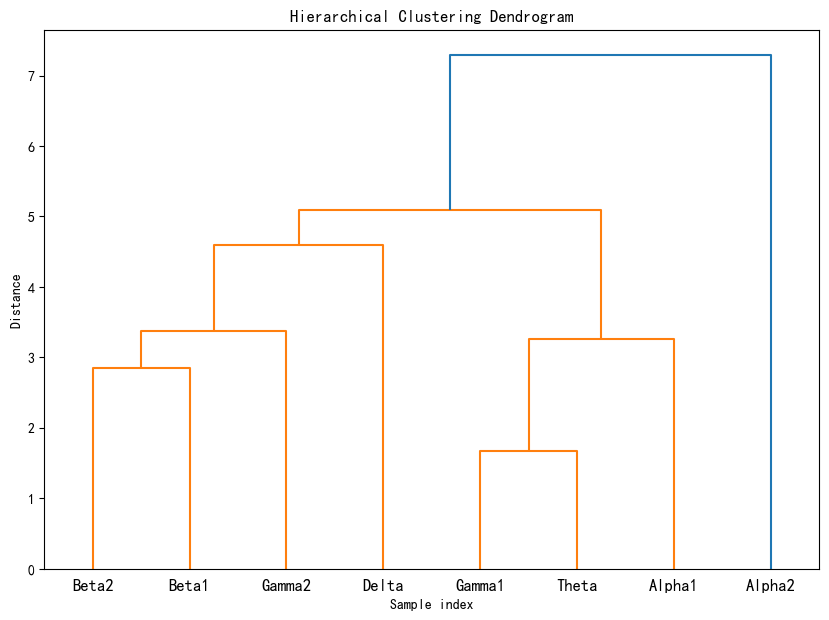

In [22]:
from scipy.cluster.hierarchy import linkage, dendrogram
# 应用层次聚类算法
# method='ward'是一种常用的凝聚方法，distance.p='euclidean'指定使用欧氏距离
Z = linkage(df_transposed, method='ward', metric='euclidean')
# 绘制树状图
plt.figure(figsize=(10, 7))
time_series_names = ["Delta","Theta","Alpha1","Alpha2","Beta1","Beta2","Gamma1","Gamma2"]
dendrogram(Z, orientation='top', labels=time_series_names, distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_14240\1705998259.py:16: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(dtw_matrix, method='average')  # 使用平均链接方法


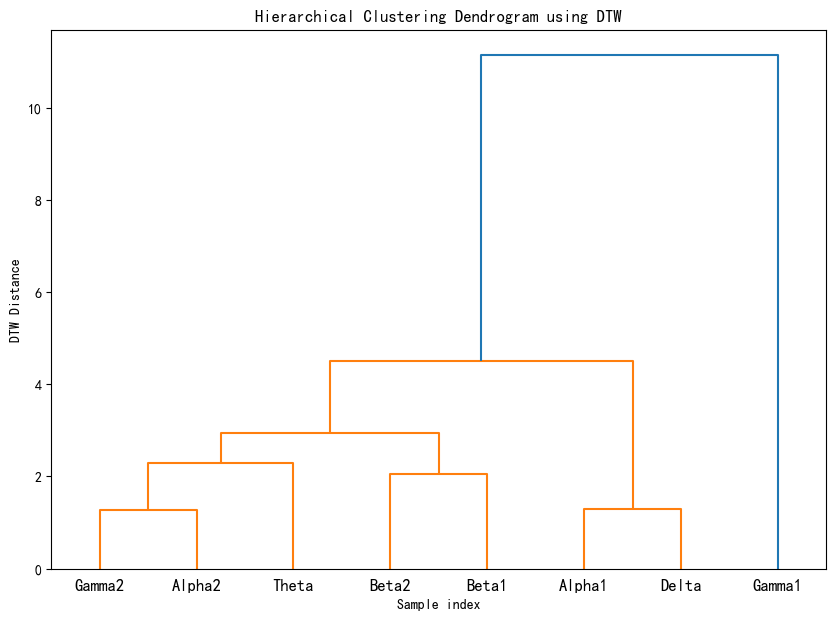

In [23]:
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
from fastdtw import fastdtw

# 假设time_series_data是一个包含时间序列数据的数组或列表的列表

# 计算DTW距离矩阵
dtw_matrix = np.zeros((len(df_transposed), len(df_transposed)))
for i in range(len(df_transposed)):
    for j in range(i + 1, len(df_transposed)):
        distance = fastdtw(df_transposed[i], df_transposed[j])[0]
        dtw_matrix[i, j] = distance
        dtw_matrix[j, i] = distance  # 由于矩阵是对称的，复制距离值

# 应用层次聚类算法
Z = linkage(dtw_matrix, method='average')  # 使用平均链接方法

# 绘制树状图
plt.figure(figsize=(10, 7))
time_series_names = ["Delta","Theta","Alpha1","Alpha2","Beta1","Beta2","Gamma1","Gamma2"]
dendrogram(Z, orientation='top', labels=time_series_names, distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram using DTW')
plt.xlabel('Sample index')
plt.ylabel('DTW Distance')
plt.show()